# Machine Learning foundation project - Customer Classification

<center><img width=40% src="https://github.com/kings-shah/Customer-Classification/blob/main/bank.jpg?raw=true"></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>
**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)<br>
  - **4.2** [**Data Information**](#Section42)<br>
**5.** [**Data Post-Processing**](#Section5)<br>
  - **5.1** [**Feature Engineering**](#Section51)<br> 
  - **5.2** [**Data Encoding**](#Section52)<br> 
  - **5.3** [**Data Preparation**](#Section53)<br>
  - **5.4** [**Data Scaling**](#Section54)<br>

**6.** [**Model Development & Evaluation**](#Section6)<br>
 - **6.1** [**Baseline Model Development**](#Section61)<br> 
  - **6.2** [**Model Evaluation**](#Section62)<br>
  - **6.3** [**Test Data**](#Section63)<br>


<a name = Section1></a>
# **1. Introduction**
---------------------------------
###### Company Introduction
Your client for this project is a retail banking institution.

They are going to float a stock trading facility for their existing customers.
The idea is to use data to classify whether a customer belongs to a high net worth or low net worth group.
They will have to incentivize their customers to adopt their offerings.
One way to incentivize is to offer discounts on the commission for trading transactions.

Current Scenario
The company rolled out this service to about 10,000+ of its customers and observed their trading behavior for 6 months and after that, they labeled them into two revenue grids 1 and 2.



<a name = Section2></a>
# **2. Problem Statement**
-----------
<b>Objective:</b>
<ul>
    <li><b>Deliverable:</b> Predict whether a customer belongs to a high net worth or low net worth group.
    <li><b>Machine Learning Task:</b> Classification
    <li><b>Target Variable: </b>Status (high net worth (1) / low net worth (2))
</ul>

---
<a name = Section3></a>
# **3. Importing Libraries**
---

In [9]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)         # To display all the data in each column
pd.set_option('display.max_columns', None)          # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.
#------------------------------------------------------------------------------------------------------------------------------

import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
import sklearn.metrics
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
from sklearn.model_selection import RandomizedSearchCV              # To find best hyperparamter setting for the algorithm
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix
#import pydotplus                                                    # To generate pydot file
from IPython.display import Image                                   # To generate image using pydot file
#-------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
from sklearn.metrics import plot_roc_curve
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

#Printing version of few key libraries to ensure correct once are used
print ("pandas version", pd.__version__)
print ("numpy version", np.__version__)
print ("seaborn version", sns.__version__)
print ("sklearn version", sklearn.__version__)

pandas version 1.1.3
numpy version 1.19.2
seaborn version 0.11.0
sklearn version 0.23.2


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The **dataset** consists of the information about **Customers** Along with column **Revenue_Grid** which classifies the customers into high net worth customers (1) and low net worth customers (2).


| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 8124 | 32 | 1619 KB | 

<br>

| ID | Feature Name | Description of the feature |
| :-- | :--| :--| 
|01| **REF_NO**   | Reference Number of the customer                          |
|02| **children**      | Number of children each customer has                 |
|03| **Age_band**        | Age Group to which the customer belongs            |
|04| **status**          | Marital Status of the customer                     |
|05| **occupation**      | Job or profession of the customer                  |
|06| **occupation_partner**           | Job or profession of the customer's partner                                  |
|07| **home_status**     | Home Status of the customers |
|08| **family_income**     | Income Range of the customer's family|
|09| **self_employed**        | Whether self-employed or not                                         |
|10| **self_employed_partner**          | Whether the partner self-employed or not                                   |
|11| **year_last_moved**         | Moving Year from the last location of the customer  |
|12| **TVarea**     | Television Region of the customer                                   |
|13| **post_code**     | 	Postal Code of the customer                                  |
|14| **post_area**     | Postal Area of the customer                                  |
|15| **Average_Credit_Card_Transaction**     | Average Credit Card Transaction per year by the customer           |
|16| **Balance_Transfer**     | Transfer of the Balance in an account to another account by the customer           |
|17| **Term_Deposit**     | Cash Investment Help at Financial Institute provided to the customer                              |
|18| **Life_Insurance**     | Basic Life Insurance Coverage of the customer                                  |
|19| **Medical_Insurance**     | Medical Insurance Coverage of the customer                                  |
|20| **Average_A/C_Balance**     | Average Balance in the account of the customer                                  |
|21| **Personal_Loan**     | Amount of Personal Loan taken by the customer                                  |
|22| **Investment_in_Mutual_Fund**     | Amount Invested in Mutual Funds by the customer                                  |
|23| **Investment_Tax_Saving_Bond**     | Amount Invested in Tax Saving Bond by the customer                                  |
|24| **Home_Loan**     | Amount of Home Loan taken by the customer                                   |
|25| **Online_Purchase_Amount**     | Amount spent by the customer on online purchases                                   |
|26| **gender**     | Gender of the customer                                   |
|27| **region**     | Region of the customer                                   |
|28| **Investment_in_Commodity**     | Amount Invested in Commodity by the customer                                   |
|29| **Investment_in_Equity**     | Amount Invested in Equity by the customer                                   |
|30| **Investment_in_Derivative**     | Amount Invested in Derivatives by the customer                                   |
|31| **Portfolio_Balance**     | 	Balanced Investment Strategy of the customer                                   |
|32| **Revenue_Grid**     | Grid report of the customers                                   |

In [22]:
cust=pd.read_csv('existing_base_train.csv')

In [23]:
#geting the shape of the data
cust.shape

(8124, 32)

In [24]:
cust.Revenue_Grid.value_counts()

2    7264
1     860
Name: Revenue_Grid, dtype: int64

In [25]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

In [28]:
#Basic statistical details for categorical variables
cust.describe(include=[np.object])

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,post_code,post_area,gender,region
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,5,13,5,9,9,5,13,2,2,14,8050,1937,3,13
top,Zero,45-50,Partner,Professional,Unknown,Own Home,">=35,000",No,No,Central,TF6 6LY,PR5,Female,South East
freq,4991,1098,6124,1949,1942,7506,2014,7543,7207,1294,2,28,6106,1680


<b>Observations:</b>
<ul>
    <li>No missing values
     <li>Children column has maximum "Zero" value
     <li>Majority customers are of the age band <b>45-50</b>
     <li> Most of them are <b>Own Home</b>
     <li> Most customer's Family income is <b>>=35,000</b>
     <li> Most of the customers are <b>Females</b>    

In [30]:
#Basic statistical details for numeric variables
cust.describe(include=[np.float64])

,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.00000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,23.251094,46.082922,27.284649,65.317939,18.826195,31.838023,25.41583,41.723628,6.057246,4.416914,19.198658,36.152749,21.442475,31.530652,89.353368
std,51.147496,79.084692,54.133537,95.762451,32.022332,45.249440,85.13015,64.416023,12.673374,9.945747,92.343126,42.474953,32.261660,39.480660,108.303538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.430000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.282500,4.660000,8.740000,26.277500
50%,0.000000,17.485000,0.000000,31.475000,0.010000,14.980000,0.00000,23.480000,0.000000,0.000000,0.000000,23.590000,12.820000,21.140000,65.560000
75%,23.480000,64.990000,34.490000,92.887500,26.970000,45.922500,20.82750,59.440000,5.490000,4.490000,7.480000,49.795000,27.972500,42.392500,123.970000
max,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.93000,2561.270000,156.870000,162.350000,4306.420000,1231.090000,1279.100000,1771.160000,4283.560000


<b>Observations:</b>
<ul>
    <li>No missing values
     <li>Most of the columns are Skewed or  Highly Skewed
 

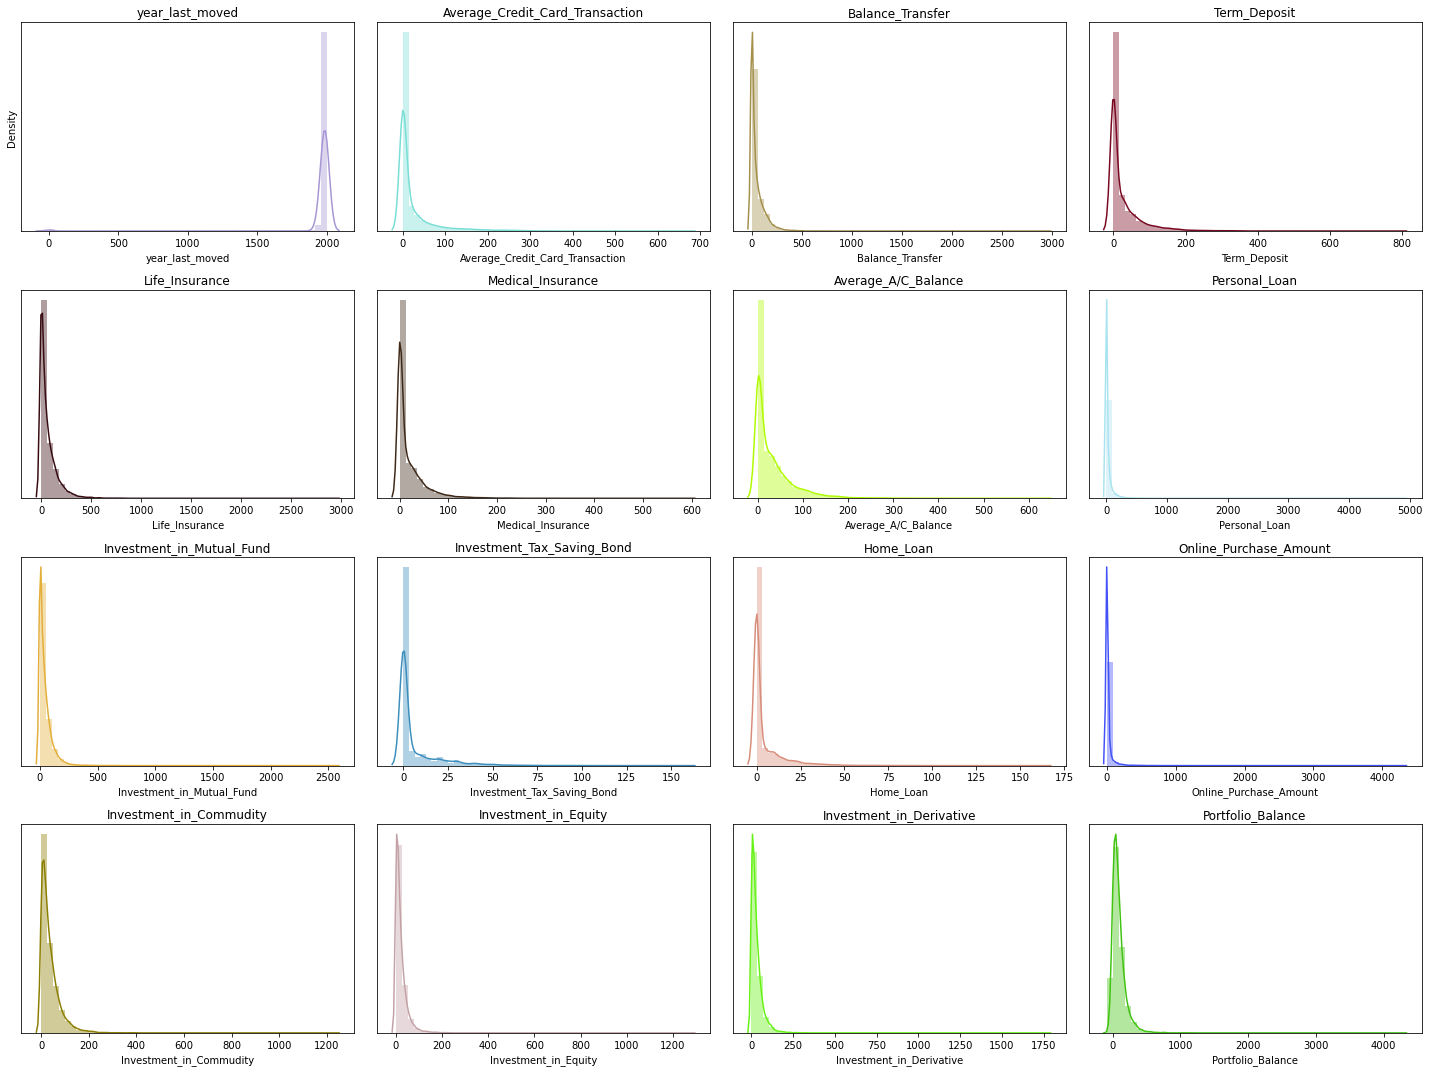

In [33]:
# For Random seed values
from random import randint
fig, axes = plt.subplots(nrows = 4, ncols = 4, sharex = False, figsize=(20, 15))
colors = []
for i in range(16):
  colors.append('#%06X' % randint(0, 0xFFFFFF))
  columns=['year_last_moved','Average_Credit_Card_Transaction', 'Balance_Transfer', 'Term_Deposit', 'Life_Insurance', 'Medical_Insurance', 'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund', 'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount', 'Investment_in_Commudity', 'Investment_in_Equity', 'Investment_in_Derivative', 'Portfolio_Balance']
for ax, col, color in zip(axes.flat, columns, colors):
  sns.distplot(a = cust[col], bins = 50, ax = ax, color = color)
  ax.set_title(col)
  plt.setp(axes, yticks=[])
  ax.grid(False)
plt.tight_layout()
plt.show()

Categorical variables:
['children', 'age_band', 'status', 'occupation', 'occupation_partner', 'home_status', 'family_income', 'self_employed', 'self_employed_partner', 'TVarea', 'post_code', 'post_area', 'gender', 'region']


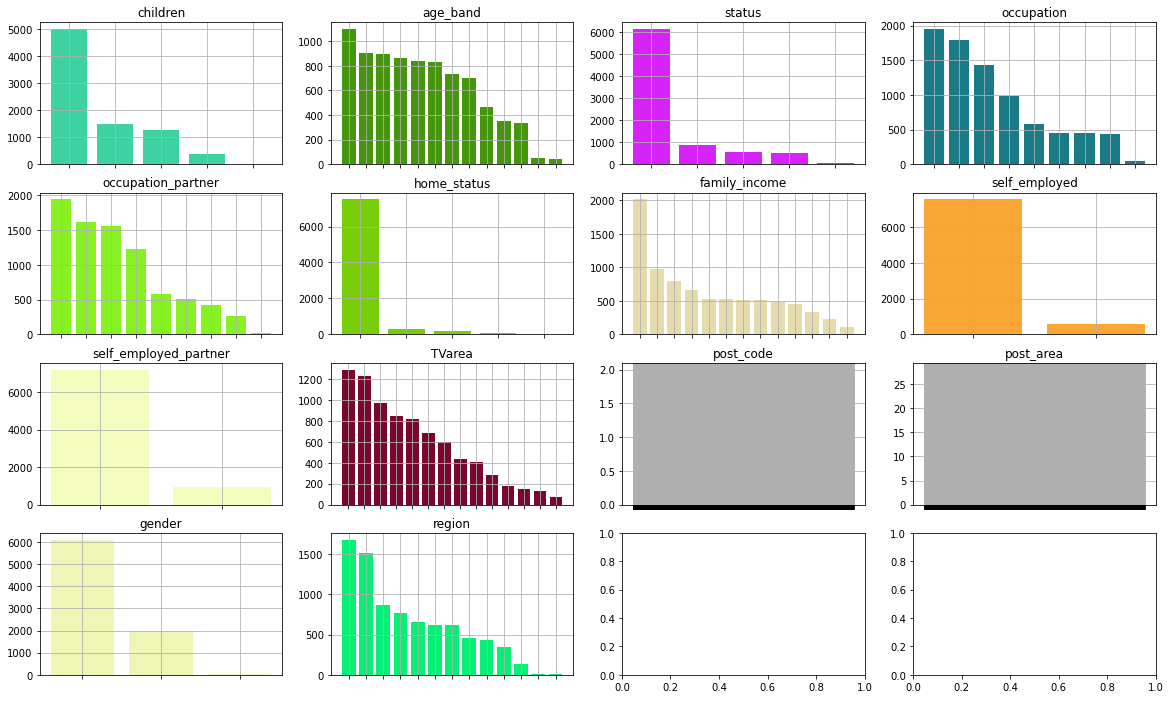

In [39]:
# Get list of categorical variables
s = (cust.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)
fig, axes = plt.subplots(nrows = 4, ncols = 4, sharex = False, figsize=(20, 12))

colors = []
for i in range(14):
  colors.append('#%06X' % randint(0, 0xFFFFFF))
  
for ax, col, color in zip(axes.flat, object_cols, colors):
  ax.bar(x = cust[col].value_counts().index, height = cust[col].value_counts(), color = color)
  ax.set_title(col)
  ax.set_xlabel(' ')
  ax.set_xticklabels(labels = ' ')
  ax.grid(True)

<a name = Section5></a>
### **5 Data Post-Processing**

<a name = Section51></a>
### **5.1 Feature Engineering**


To avoid increasing the dimensions after one hot encoding:
<ul>
    <li>Home status has been reduced to only 2 values
        <ul>
            <li>Owner</li>
            <li>Rent</li>
        </ul>
    </li>
    <li>Divided all the values of Occupation field in to 2 categories 
        <ul>
            <li>Working</li> 
            <li>non working</li>
         </ul>
     </li>
    <li>Merging the <b>occupation</b> and <b>occupation_partner</b> made a new field <b>occupation_Status_new</b>
        <ul>
            <li>both working
            <li>both not working
            <li>single
        </ul>
     </li>
    <li>Merged the columns <b>self_employed</b> and <b>self_employed_partner</b> to make a new column self_employed_new with values
        <ul>
            <li>both_yes
             <li>both_no
              <li>Single
        </ul>




In [40]:
def home_stat(g): 
    if g =='Own Home':
        return 'Owner'
    elif g == 'Rent Privately':
        return 'Rent'
    elif g == 'Rent from Council/HA':
        return 'Rent'
    elif g == 'Live in Parental Hom':
        return 'Rent'
    elif g in 'Unclassified':
        return 'Rent'
working=['Professional','Manual Worker','Business Manager','Secretarial/Admin','Other']
non_working=['Retired','Housewife','Student']
def occ(g):
    if (g.occupation in working) & (g.occupation_partner in working):
        return 'both_working'
    elif (g.occupation in non_working) & (g.occupation_partner in non_working):
        return 'both_non_working'
    else:
        return 'single'
def self_emp(g):
    if (g.self_employed == 'Yes') & (g.self_employed_partner == 'Yes'):
        return 'both_yes'
    elif (g.self_employed == 'No') & (g.self_employed_partner == 'No'):
        return 'both_no'
    else:
        return 'single'

def feature_engg():
    cust['children']=cust['children'].replace('Zero','0')# replacing 'Zero' with numeric value
    cust['children']=cust['children'].replace('4+','4') # replacing '+4' with 4 so whole column can be converted to int field
    cust['family_income']=cust['family_income'].replace(['>=35,000','<22,500, >=20,000','<25,000, >=22,500','<30,000, >=27,500', '<20,000, >=17,500','<27,500, >=25,000','< 4,000', '<15,000, >=12,500', '<17,500, >=15,000','< 8,000, >= 4,000', '<12,500, >=10,000', '<10,000, >= 8,000'],['35000+','20,000-22,500','22,500-25,000','27,500-27,500','17,500-20,000','25,000-27,500','0-4,000','12,500-15,000','15,000-17,500','4,000-8,000','10,000-12,500','8,000-10,000'])
    cust['total_invest']=cust.Investment_in_Mutual_Fund+cust.Investment_Tax_Saving_Bond+cust.Portfolio_Balance
    cust['total_loan']=cust.Personal_Loan+cust.Home_Loan
    cust['total_isurance']=cust.Life_Insurance+cust.Medical_Insurance
    cust['home_status_new']=cust['home_status'].apply(home_stat)
    cust['occupation_Status_new']=cust.apply(occ,axis=1)
    cust['self_employed_new']=cust.apply(self_emp,axis=1)
feature_engg()
cust.shape

(8124, 38)

In [41]:
cust.shape

(8124, 38)

In [42]:
cust_new=cust[['REF_NO','children','age_band','status','family_income','post_area','Average_Credit_Card_Transaction','Balance_Transfer','Term_Deposit', 'total_isurance','Average_A/C_Balance','Online_Purchase_Amount','gender', 'region','total_invest', 'total_loan', 'home_status_new','occupation_Status_new', 'self_employed_new','Revenue_Grid']]

<a name = Section52></a>
### **5.2 Data Encoding**

In [93]:
#One hot encoding
def encoding_stat(cust_new):
    stat=pd.get_dummies(cust_new.status)
    stat.head(10)
    stat.drop('Unknown',axis=1,inplace=True)
    cust_new=pd.concat([cust_new,stat],axis=1)
    return cust_new
cust_new=encoding_stat(cust_new)



In [94]:
cust_new.shape

(8124, 24)

In [95]:
cust_new.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'family_income',
       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'total_isurance', 'Average_A/C_Balance',
       'Online_Purchase_Amount', 'gender', 'region', 'total_invest',
       'total_loan', 'home_status_new', 'occupation_Status_new',
       'self_employed_new', 'Revenue_Grid', 'Divorced/Separated', 'Partner',
       'Single/Never Married', 'Widowed'],
      dtype='object')

In [96]:
def encoding(cust_new):
    cat_columns=['home_status_new','occupation_Status_new','self_employed_new']
    cat_dum=pd.get_dummies(cust_new[cat_columns],drop_first=True)
    cust_new=pd.concat([cust_new,cat_dum],axis=1)
    return cust_new
cust_new=encoding(cust_new)

In [97]:
cust_new.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'family_income',
       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'total_isurance', 'Average_A/C_Balance',
       'Online_Purchase_Amount', 'gender', 'region', 'total_invest',
       'total_loan', 'home_status_new', 'occupation_Status_new',
       'self_employed_new', 'Revenue_Grid', 'Divorced/Separated', 'Partner',
       'Single/Never Married', 'Widowed', 'home_status_new_Rent',
       'occupation_Status_new_both_working', 'occupation_Status_new_single',
       'self_employed_new_both_yes', 'self_employed_new_single'],
      dtype='object')

In [98]:
cust_new.shape

(8124, 29)

In [99]:
cust_new.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'family_income',
       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'total_isurance', 'Average_A/C_Balance',
       'Online_Purchase_Amount', 'gender', 'region', 'total_invest',
       'total_loan', 'home_status_new', 'occupation_Status_new',
       'self_employed_new', 'Revenue_Grid', 'Divorced/Separated', 'Partner',
       'Single/Never Married', 'Widowed', 'home_status_new_Rent',
       'occupation_Status_new_both_working', 'occupation_Status_new_single',
       'self_employed_new_both_yes', 'self_employed_new_single'],
      dtype='object')

In [100]:
cust_new.drop(['home_status_new','occupation_Status_new','self_employed_new','status'],axis=1,inplace=True)

In [101]:
cust_new.gender.value_counts()

Female     6106
Male       1987
Unknown      31
Name: gender, dtype: int64

In [102]:
cust_new.head()

,REF_NO,children,age_band,family_income,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,total_isurance,Average_A/C_Balance,Online_Purchase_Amount,gender,region,total_invest,total_loan,Revenue_Grid,Divorced/Separated,Partner,Single/Never Married,Widowed,home_status_new_Rent,occupation_Status_new_both_working,occupation_Status_new_single,self_employed_new_both_yes,self_employed_new_single
0,5466,2,31-35,35000+,M51,26.98,29.99,312.25,388.51,108.85,7.68,Female,North West,503.70,230.87,2,0,1,0,0,0,1,0,0,0
1,9091,0,45-50,35000+,L40,35.98,74.48,0.00,110.95,48.45,18.99,Female,North West,89.22,15.99,2,0,1,0,0,0,1,0,0,0
2,9744,1,36-40,"20,000-22,500",TA19,0.00,24.46,0.00,18.44,0.00,0.00,Female,South West,24.96,0.02,2,0,1,0,0,1,1,0,1,0
3,10700,2,31-35,"22,500-25,000",FK2,44.99,0.00,0.00,29.99,0.00,0.00,Female,Scotland,68.98,0.00,2,0,1,0,0,0,1,0,0,0
4,1987,0,55-60,35000+,LS23,0.00,0.00,0.00,0.00,0.00,0.00,Female,Unknown,11.86,0.00,2,0,1,0,0,0,0,1,0,0


In [103]:
def encoding_gender(cust_new):
    gender=pd.get_dummies(cust_new.gender)
    #gender.head(10)
    gender.drop('Unknown',axis=1,inplace=True)
    cust_new=pd.concat([cust_new,gender],axis=1)
    return cust_new
cust_new=encoding_gender(cust_new)

In [104]:
cust_new.shape

(8124, 27)

In [105]:
cust_new.columns

Index(['REF_NO', 'children', 'age_band', 'family_income', 'post_area',
       'Average_Credit_Card_Transaction', 'Balance_Transfer', 'Term_Deposit',
       'total_isurance', 'Average_A/C_Balance', 'Online_Purchase_Amount',
       'gender', 'region', 'total_invest', 'total_loan', 'Revenue_Grid',
       'Divorced/Separated', 'Partner', 'Single/Never Married', 'Widowed',
       'home_status_new_Rent', 'occupation_Status_new_both_working',
       'occupation_Status_new_single', 'self_employed_new_both_yes',
       'self_employed_new_single', 'Female', 'Male'],
      dtype='object')

In [106]:
cust_new.drop('gender',axis=1,inplace=True)

In [107]:
cust_new.columns

Index(['REF_NO', 'children', 'age_band', 'family_income', 'post_area',
       'Average_Credit_Card_Transaction', 'Balance_Transfer', 'Term_Deposit',
       'total_isurance', 'Average_A/C_Balance', 'Online_Purchase_Amount',
       'region', 'total_invest', 'total_loan', 'Revenue_Grid',
       'Divorced/Separated', 'Partner', 'Single/Never Married', 'Widowed',
       'home_status_new_Rent', 'occupation_Status_new_both_working',
       'occupation_Status_new_single', 'self_employed_new_both_yes',
       'self_employed_new_single', 'Female', 'Male'],
      dtype='object')

In [108]:
#label encoding for age_band
ageband_map={
                'Unknown':0, '18-21':1, '22-25':2,'26-30':3, '31-35':4,'36-40':5,'41-45':6, '45-50':7,
                 '51-55':8,'55-60':9, '61-65':10, '65-70':11,'71+':12 
}
cust_new['ageband_ordinal']=cust_new.age_band.map(ageband_map)

In [109]:
cust_new.drop('age_band',axis=1,inplace=True)

In [110]:
#label encoding for age_band
family_income_map={
                'Unknown':0, '0-4,000':1, '4,000-8,000':2,'8,000-10,000':3, '10,000-12,500':4,'12,500-15,000':5,'15,000-17,500':6, '17,500-20,000':7,
                 '20,000-22,500':8,'22,500-25,000':9, '25,000-27,500':10, '27,500-27,500':11,'35000+':12 
}
cust_new['family_income_ordinal']=cust_new.family_income.map(family_income_map)

In [111]:
cust_new.drop('family_income',axis=1,inplace=True)

In [112]:
#we can replace with its value counts as no one is same number
cust_new.region.value_counts()

South East          1680
North West          1517
Unknown              866
South West           769
West Midlands        658
East Midlands        623
Scotland             615
North                460
Wales                437
East Anglia          344
Northern Ireland     135
Isle of Man           15
Channel Islands        5
Name: region, dtype: int64

In [113]:
reg=cust_new.groupby('region').size()/len(cust_new)
cust_new.loc[:,'region_encoded']=cust_new.region.map(reg)
# try with just value count if F1 changes

In [114]:
cust_new.drop('post_area',axis=1,inplace=True)

In [115]:
cust_new.drop('region',axis=1,inplace=True)

In [116]:
cust_new.columns

Index(['REF_NO', 'children', 'Average_Credit_Card_Transaction',
       'Balance_Transfer', 'Term_Deposit', 'total_isurance',
       'Average_A/C_Balance', 'Online_Purchase_Amount', 'total_invest',
       'total_loan', 'Revenue_Grid', 'Divorced/Separated', 'Partner',
       'Single/Never Married', 'Widowed', 'home_status_new_Rent',
       'occupation_Status_new_both_working', 'occupation_Status_new_single',
       'self_employed_new_both_yes', 'self_employed_new_single', 'Female',
       'Male', 'ageband_ordinal', 'family_income_ordinal', 'region_encoded'],
      dtype='object')

<a name = Section53></a>
### **5.3 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development 

In [117]:
independent_cols=['REF_NO', 'children', 'Average_Credit_Card_Transaction',
       'Balance_Transfer', 'Term_Deposit', 'total_isurance',
       'Average_A/C_Balance', 'Online_Purchase_Amount', 'total_invest',
       'total_loan','Divorced/Separated', 'Partner',
       'Single/Never Married', 'Widowed', 'home_status_new_Rent',
       'occupation_Status_new_both_working', 'occupation_Status_new_single',
       'self_employed_new_both_yes', 'self_employed_new_single', 'Female',
       'Male', 'ageband_ordinal', 'family_income_ordinal']# removed , 'region_encoded'
X=cust_new[independent_cols] 
y=cust_new.Revenue_Grid

In [118]:
X.shape

(8124, 23)

In [119]:
y.shape

(8124,)

In [120]:
# Splitting data into training and testing sets with using Validation Test Data as 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<a name = Section54></a>
### **5.4 Data Scaling**

In [121]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
X_train[independent_cols] = robust.fit_transform(X_train)
X_test[independent_cols] = robust.transform(X_test)

---
<a name = Section6></a>
### **6. Model Development & Evaluation**
---

- In this section we will **develop a Logistic Regression model**

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **F1 Score** score as required by this project.

<a name = Section61></a>
### **6.1 Baseline Model Development**

- Here we will develop Logistic Regression classification model using default setting.

In [43]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [123]:
#predicting on train data
y_pred_train = logreg.predict(X_train)

#predicting on test data
y_pred_test = logreg.predict(X_test)

<a name = Section62></a>
### **6.2 Model Evaluation**

In [124]:
from sklearn.metrics import accuracy_score   
pred = logreg.predict(X_test)
print('Accuracy score for test data is:', accuracy_score(y_test,pred))

Accuracy score for test data is: 0.9372307692307692


In [125]:
from sklearn.metrics import f1_score    
f1_score(y_test,y_pred_test)

0.6304347826086956

In [126]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.82      0.51      0.63       170
           2       0.95      0.99      0.97      1455

    accuracy                           0.94      1625
   macro avg       0.88      0.75      0.80      1625
weighted avg       0.93      0.94      0.93      1625



<a name = Section63></a>
### **6.3 Test Data**

In [127]:
final_test=pd.read_csv('existing_base_test.csv')

In [128]:
#y_pred_final=model.predict(final_test)
def home_stat(g):
    if g =='Own Home':
        return 'Owner'
    elif g == 'Rent Privately':
        return 'Rent'
    elif g == 'Rent from Council/HA':
        return 'Rent'
    elif g == 'Live in Parental Hom':
        return 'Rent'
    elif g in 'Unclassified':
        return 'Rent'
working=['Professional','Manual Worker','Business Manager','Secretarial/Admin','Other']
non_working=['Retired','Housewife','Student']
def occ(g):
    if (g.occupation in working) & (g.occupation_partner in working):
        return 'both_working'
    elif (g.occupation in non_working) & (g.occupation_partner in non_working):
        return 'both_non_working'
    else:
        return 'single'
def self_emp(g):
    if (g.self_employed == 'Yes') & (g.self_employed_partner == 'Yes'):
        return 'both_yes'
    elif (g.self_employed == 'No') & (g.self_employed_partner == 'No'):
        return 'both_no'
    else:
        return 'single'


def feature_engg():
    final_test['children']=final_test['children'].replace('Zero','0')
    final_test['children']=final_test['children'].replace('4+','4')
    final_test['family_income']=final_test['family_income'].replace(['>=35,000','<22,500, >=20,000','<25,000, >=22,500','<30,000, >=27,500', '<20,000, >=17,500','<27,500, >=25,000','< 4,000', '<15,000, >=12,500', '<17,500, >=15,000','< 8,000, >= 4,000', '<12,500, >=10,000', '<10,000, >= 8,000'],['35000+','20,000-22,500','22,500-25,000','27,500-27,500','17,500-20,000','25,000-27,500','0-4,000','12,500-15,000','15,000-17,500','4,000-8,000','10,000-12,500','8,000-10,000'])
    final_test['total_invest']=final_test.Investment_in_Mutual_Fund+final_test.Investment_Tax_Saving_Bond+final_test.Portfolio_Balance
    final_test['total_loan']=final_test.Personal_Loan+final_test.Home_Loan
    final_test['total_isurance']=final_test.Life_Insurance+final_test.Medical_Insurance
    final_test['home_status_new']=final_test['home_status'].apply(home_stat)
    final_test['occupation_Status_new']=final_test.apply(occ,axis=1)
    final_test['self_employed_new']=final_test.apply(self_emp,axis=1)
feature_engg()
final_test.shape


(2031, 37)

In [129]:
final_test_new=final_test[['REF_NO','children','age_band','status','family_income','post_area','Average_Credit_Card_Transaction','Balance_Transfer','Term_Deposit', 'total_isurance','Average_A/C_Balance','Online_Purchase_Amount','gender', 'region','total_invest', 'total_loan', 'home_status_new','occupation_Status_new', 'self_employed_new']]

In [130]:
def encoding_stat(final_test_new):
    stat=pd.get_dummies(final_test_new.status)
    stat.head(10)
    stat.drop('Unknown',axis=1,inplace=True)
    final_test_new=pd.concat([final_test_new,stat],axis=1)
    return final_test_new
final_test_new=encoding_stat(final_test_new)
def encoding(final_test_new):
    cat_columns=['home_status_new','occupation_Status_new','self_employed_new']
    cat_dum=pd.get_dummies(final_test_new[cat_columns],drop_first=True)
    final_test_new=pd.concat([final_test_new,cat_dum],axis=1)
    return final_test_new
final_test_new=encoding(final_test_new)
final_test_new.drop(['home_status_new','occupation_Status_new','self_employed_new','status'],axis=1,inplace=True)
def encoding_gender(final_test_new):
    gender=pd.get_dummies(final_test_new.gender)
    #gender.head(10)
    gender.drop('Unknown',axis=1,inplace=True)
    final_test_new=pd.concat([final_test_new,gender],axis=1)
    return final_test_new
final_test_new=encoding_gender(final_test_new)
final_test_new.drop('gender',axis=1,inplace=True)#label encoding for age_band
ageband_map={
                'Unknown':0, '18-21':1, '22-25':2,'26-30':3, '31-35':4,'36-40':5,'41-45':6, '45-50':7,
                 '51-55':8,'55-60':9, '61-65':10, '65-70':11,'71+':12 
}
final_test_new['ageband_ordinal']=final_test_new.age_band.map(ageband_map)
final_test_new.drop('age_band',axis=1,inplace=True)
#label encoding for family income
family_income_map={
                'Unknown':0, '0-4,000':1, '4,000-8,000':2,'8,000-10,000':3, '10,000-12,500':4,'12,500-15,000':5,'15,000-17,500':6, '17,500-20,000':7,
                 '20,000-22,500':8,'22,500-25,000':9, '25,000-27,500':10, '27,500-27,500':11,'35000+':12 
}
final_test_new['family_income_ordinal']=final_test_new.family_income.map(family_income_map)
final_test_new.drop('family_income',axis=1,inplace=True)
#reg=final_test_new.groupby('region').size()/len(final_test_new)
#final_test_new.loc[:,'region_encoded']=final_test_new.region.map(reg)
independent_cols=['REF_NO', 'children', 'Average_Credit_Card_Transaction',
       'Balance_Transfer', 'Term_Deposit', 'total_isurance',
       'Average_A/C_Balance', 'Online_Purchase_Amount', 'total_invest',
       'total_loan', 'Divorced/Separated', 'Partner',
       'Single/Never Married', 'Widowed', 'home_status_new_Rent',
       'occupation_Status_new_both_working', 'occupation_Status_new_single',
       'self_employed_new_both_yes', 'self_employed_new_single', 'Female',
       'Male', 'ageband_ordinal', 'family_income_ordinal']
X=final_test_new[independent_cols]

In [131]:
X.shape

(2031, 23)

In [132]:
X.columns

Index(['REF_NO', 'children', 'Average_Credit_Card_Transaction',
       'Balance_Transfer', 'Term_Deposit', 'total_isurance',
       'Average_A/C_Balance', 'Online_Purchase_Amount', 'total_invest',
       'total_loan', 'Divorced/Separated', 'Partner', 'Single/Never Married',
       'Widowed', 'home_status_new_Rent', 'occupation_Status_new_both_working',
       'occupation_Status_new_single', 'self_employed_new_both_yes',
       'self_employed_new_single', 'Female', 'Male', 'ageband_ordinal',
       'family_income_ordinal'],
      dtype='object')

In [133]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
X[independent_cols] = robust.fit_transform(X)
#X_test[independent_cols] = robust.transform(X_test)

In [134]:
y_pred_final=logreg.predict(X)

In [135]:
df3 = pd.DataFrame({"Ref_no":final_test_new.REF_NO,"Revenue_grid":y_pred_final})

In [136]:
df3.to_csv('cust_classification_output.csv',index=False, header=False)

In [137]:
df3.Revenue_grid.value_counts()

2    1925
1     106
Name: Revenue_grid, dtype: int64